## Loading in the Data

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



In [22]:
df = pd.read_csv('cardio_train1.csv')
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [23]:
df.shape

(9999, 13)

In [24]:
df.describe()

id           age       gender       height       weight  \
count   9999.000000   9999.000000  9999.000000  9999.000000  9999.000000   
mean    7108.527853  19449.312331     1.345335   164.308331    74.304340   
std     4127.675620   2479.751490     0.475501     8.179194    14.566945   
min        0.000000  10878.000000     1.000000    70.000000    30.000000   
25%     3529.500000  17629.500000     1.000000   159.000000    65.000000   
50%     7079.000000  19699.000000     1.000000   165.000000    72.000000   
75%    10693.500000  21314.000000     2.000000   170.000000    82.000000   
max    14253.000000  23670.000000     2.000000   250.000000   200.000000   

              ap_hi         ap_lo  cholesterol         gluc        smoke  \
count   9999.000000   9999.000000  9999.000000  9999.000000  9999.000000   
mean     128.035804     97.954895     1.365037     1.222222     0.089009   
std      116.841395    207.208304     0.677682     0.565585     0.284771   
min     -100.000000      0.000000     1.000000     1.000000     0.000000   
25%      120.000000     80.000000     1.000000     1.000000     0.000000   
50%      120.000000     80.000000     1.000000     1.000000     0.000000   
75%      140.000000     90.000000     2.000000     1.000000     0.000000   
max    11500.000000  10000.000000     3.000000     3.000000     1.000000   

              alco      active       cardio  
count  9999.000000  9999.00000  9999.000000  
mean      0.053705     0.79718     0.503050  
std       0.225447     0.40212     0.500016  
min       0.000000     0.00000     0.000000  
25%       0.000000     1.00000     0.000000  
50%       0.000000     1.00000     1.000000  
75%       0.000000     1.00000     1.000000  
max       1.000000     1.00000     1.000000

## Exploratory Data Analysis



In [25]:
df.cardio.value_counts() 

cardio
1    5030
0    4969
Name: count, dtype: int64

<BarContainer object of 2 artists>

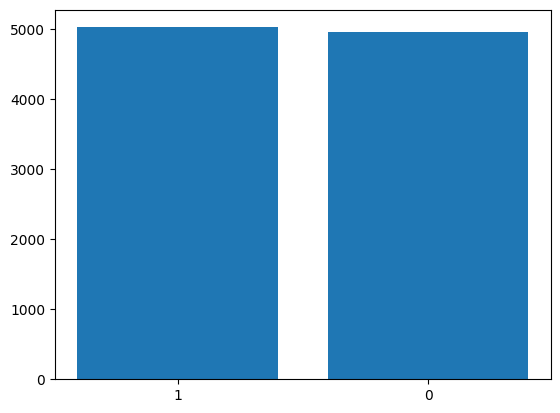

In [26]:
plt.bar(['1','0'], height=df.cardio.value_counts())

# DATA PREPROCESSING 

In [27]:
missing_values = df.isnull().sum()

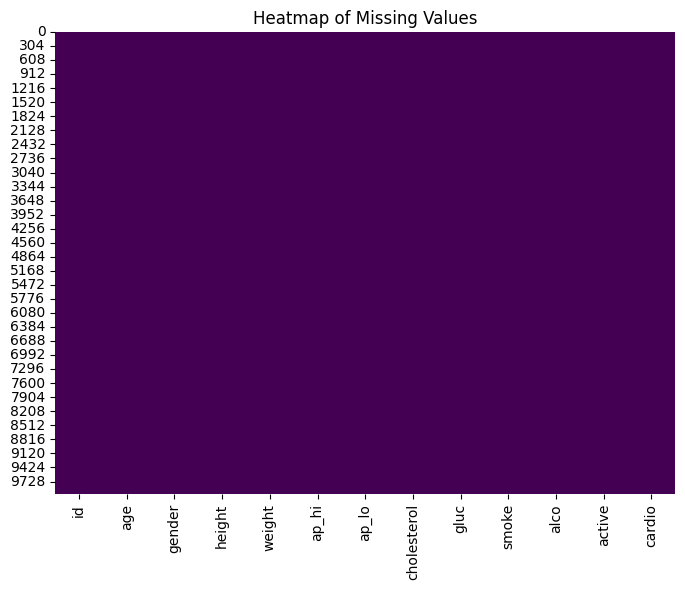

In [28]:
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # Customize the colormap if needed
plt.title('Heatmap of Missing Values')
plt.show()

### Metrics 'height', 'weight''ap_hi', 'ap_lo','age' undergoing normalization

In [29]:
scaler = MinMaxScaler()
df[['height', 'weight','ap_hi','ap_lo']] = scaler.fit_transform(df[['height', 'weight', 'ap_hi','ap_lo']])

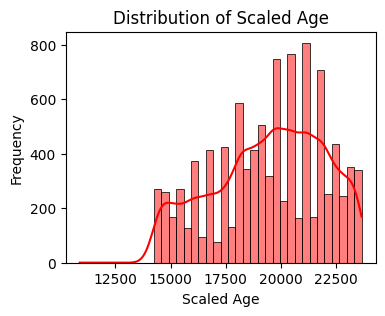

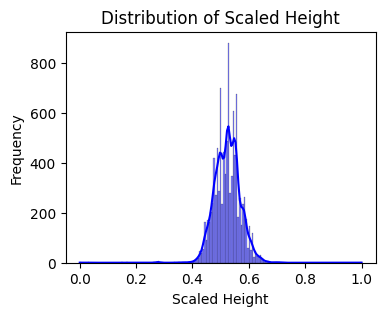

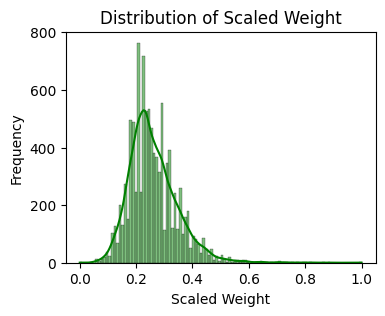

In [30]:

plt.figure(figsize=(4, 3))
sns.histplot(df['age'], kde=True, color='red')
plt.title('Distribution of Scaled Age')
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['height'], kde=True, color='blue')
plt.title('Distribution of Scaled Height')
plt.xlabel('Scaled Height')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['weight'], kde=True, color='green')
plt.title('Distribution of Scaled Weight')
plt.xlabel('Scaled Weight')
plt.ylabel('Frequency')
plt.show()

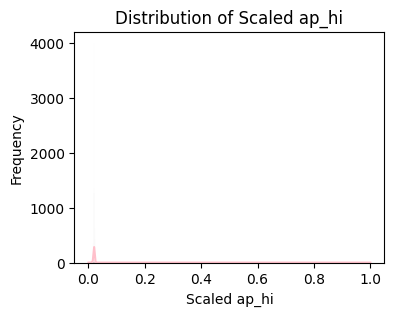

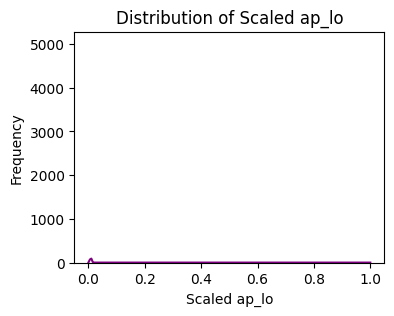

In [31]:
plt.figure(figsize=(4, 3))
sns.histplot(df['ap_hi'], kde=True, color='pink')
plt.title('Distribution of Scaled ap_hi')
plt.xlabel('Scaled ap_hi')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['ap_lo'], kde=True, color='purple')
plt.title('Distribution of Scaled ap_lo')
plt.xlabel('Scaled ap_lo')
plt.ylabel('Frequency')
plt.show()

### Outlier Removal for Height, Weight, Age

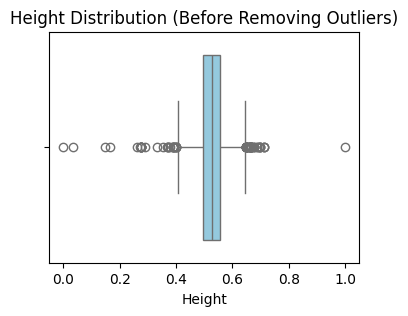

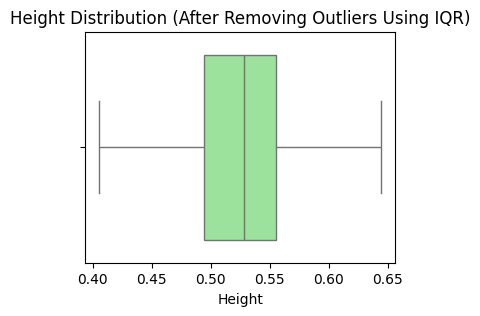

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot Height Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['height'], color='skyblue')
plt.title('Height Distribution (Before Removing Outliers)')
plt.xlabel('Height')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers based on the IQR method
df_filtered_height_iqr = df[(df['height'] >= lower_bound) & (df['height'] <= upper_bound)]

# Plot Height Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered_height_iqr['height'], color='lightgreen')
plt.title('Height Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Height')
plt.show()


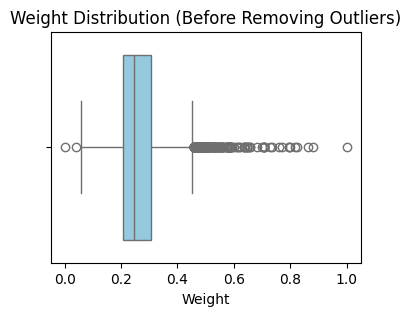

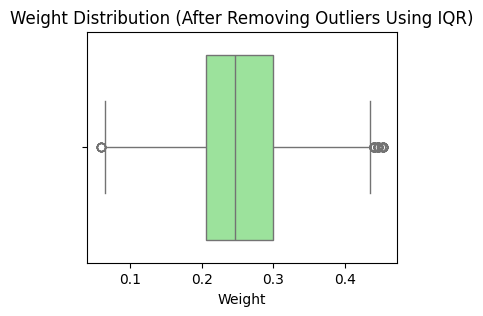

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Weight Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['weight'], color='skyblue')
plt.title('Weight Distribution (Before Removing Outliers)')
plt.xlabel('Weight')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Weight
Q1_weight = df['weight'].quantile(0.25)
Q3_weight = df['weight'].quantile(0.75)

# Calculate IQR (Interquartile Range) for Weight
IQR_weight = Q3_weight - Q1_weight

# Define lower and upper bounds for outliers in Weight data
lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

# Filter out the outliers based on the IQR method for Weight
df_filtered_weight_iqr = df[(df['weight'] >= lower_bound_weight) & (df['weight'] <= upper_bound_weight)]

# Plot Weight Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered_weight_iqr['weight'], color='lightgreen')
plt.title('Weight Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Weight')
plt.show()


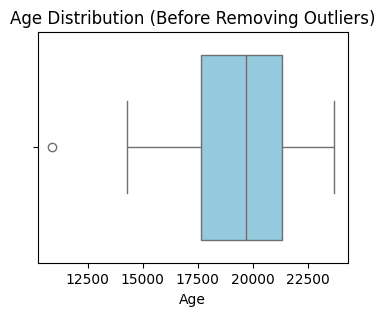

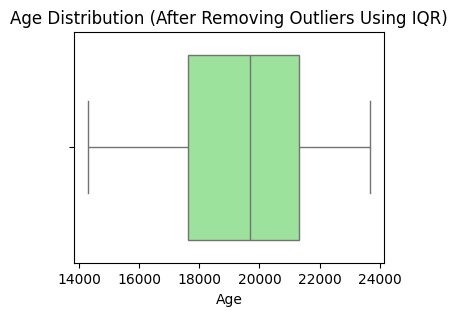

In [34]:
# Plot Age Distribution Before Removing Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Age Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Age Distribution (Before Removing Outliers)')
plt.xlabel('Age')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Age
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)

# Calculate IQR (Interquartile Range) for Age
IQR_age = Q3_age - Q1_age

# Define lower and upper bounds for outliers in Age data
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Filter out the outliers based on the IQR method for Age
df_filtered_age_iqr = df[(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age)]

# Plot Age Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered_age_iqr['age'], color='lightgreen')
plt.title('Age Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Age')
plt.show()


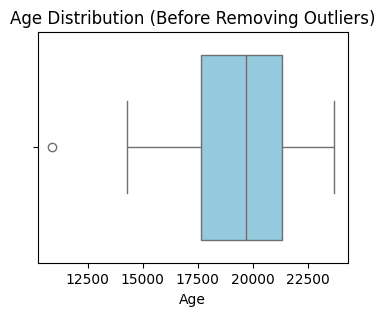

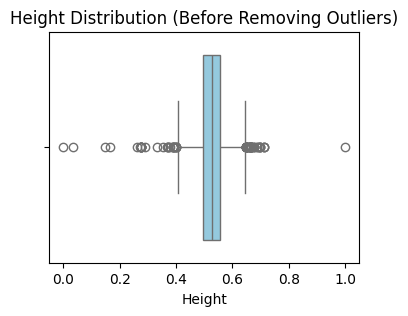

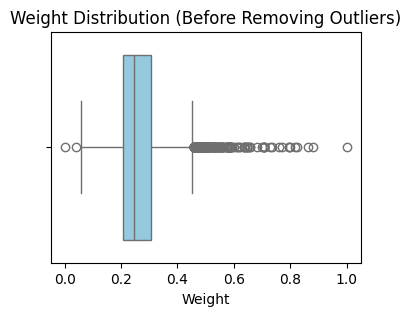

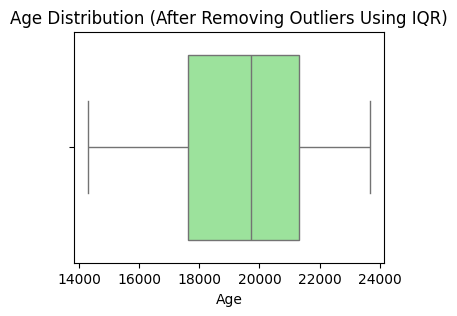

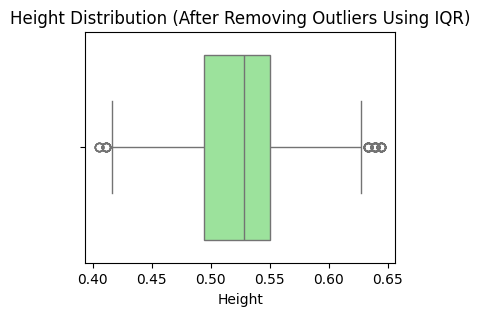

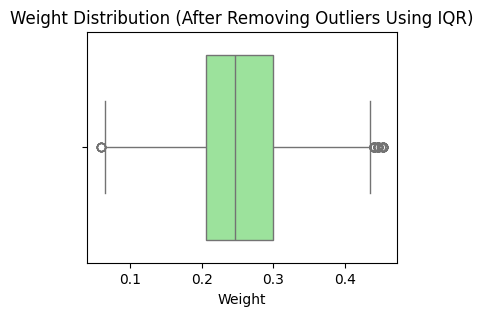

         id    age  gender    height    weight     ap_hi  ap_lo  cholesterol  \
0         0  18393       2  0.544444  0.188235  0.018103  0.008            1   
1         1  20228       1  0.477778  0.323529  0.020690  0.009            3   
2         2  18857       1  0.527778  0.200000  0.019828  0.007            3   
3         3  17623       2  0.550000  0.305882  0.021552  0.010            1   
4         4  17474       1  0.477778  0.152941  0.017241  0.006            1   
...     ...    ...     ...       ...       ...       ...    ...          ...   
9994  14247  21211       1  0.466667  0.311765  0.021552  0.009            1   
9995  14249  20427       1  0.533333  0.205882  0.019828  0.008            1   
9996  14251  18214       1  0.500000  0.370588  0.020690  0.008            2   
9997  14252  14665       1  0.488889  0.211765  0.019828  0.009            2   
9998  14253  18328       1  0.544444  0.235294  0.022414  0.008            3   

      gluc  smoke  alco  active  cardio

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Plot Age Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Age Distribution (Before Removing Outliers)')
plt.xlabel('Age')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Age
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Plot Height Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['height'], color='skyblue')
plt.title('Height Distribution (Before Removing Outliers)')
plt.xlabel('Height')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Height
Q1_height = df['height'].quantile(0.25)
Q3_height = df['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height
lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

# Plot Weight Distribution Before Removing Outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['weight'], color='skyblue')
plt.title('Weight Distribution (Before Removing Outliers)')
plt.xlabel('Weight')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Weight
Q1_weight = df['weight'].quantile(0.25)
Q3_weight = df['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight
lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

# Filter out the outliers for Age, Height, and Weight using IQR method
df_filtered = df[
    (df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age) &
    (df['height'] >= lower_bound_height) & (df['height'] <= upper_bound_height) &
    (df['weight'] >= lower_bound_weight) & (df['weight'] <= upper_bound_weight)
]

# Plot Age Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered['age'], color='lightgreen')
plt.title('Age Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Age')
plt.show()

# Plot Height Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered['height'], color='lightgreen')
plt.title('Height Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Height')
plt.show()

# Plot Weight Distribution After Removing Outliers Using IQR
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_filtered['weight'], color='lightgreen')
plt.title('Weight Distribution (After Removing Outliers Using IQR)')
plt.xlabel('Weight')
plt.show()

# Display the filtered DataFrame
print(df_filtered)



In [36]:
df_filtered.describe()

id           age       gender       height       weight  \
count   9689.000000   9689.000000  9689.000000  9689.000000  9689.000000   
mean    7117.005057  19454.075962     1.342141     0.523480     0.253705   
std     4127.671189   2481.339446     0.474451     0.042052     0.073425   
min        0.000000  14297.000000     1.000000     0.405556     0.058824   
25%     3546.000000  17629.000000     1.000000     0.494444     0.205882   
50%     7090.000000  19703.000000     1.000000     0.527778     0.247059   
75%    10711.000000  21323.000000     2.000000     0.550000     0.300000   
max    14253.000000  23670.000000     2.000000     0.644444     0.452941   

             ap_hi        ap_lo  cholesterol         gluc        smoke  \
count  9689.000000  9689.000000  9689.000000  9689.000000  9689.000000   
mean      0.019635     0.009719     1.359273     1.219321     0.087625   
std       0.010226     0.020792     0.672416     0.562647     0.282764   
min       0.000000     0.000000     1.000000     1.000000     0.000000   
25%       0.018966     0.008000     1.000000     1.000000     0.000000   
50%       0.018966     0.008000     1.000000     1.000000     0.000000   
75%       0.020690     0.009000     1.000000     1.000000     0.000000   
max       1.000000     1.000000     3.000000     3.000000     1.000000   

              alco       active       cardio  
count  9689.000000  9689.000000  9689.000000  
mean      0.053153     0.797193     0.497987  
std       0.224350     0.402111     0.500022  
min       0.000000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.000000     1.000000     0.000000  
75%       0.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

In [37]:
df_filtered.shape

(9689, 13)

## Feature Selection Using AdaBoost

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


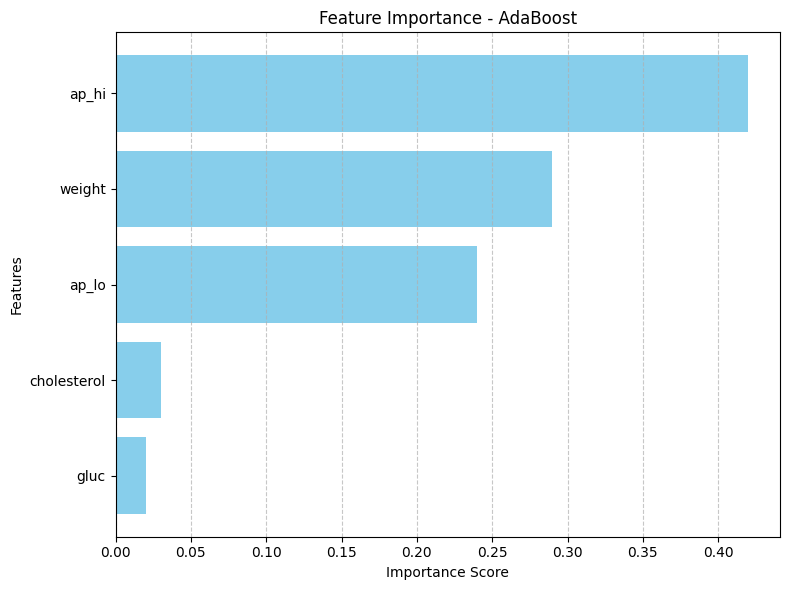

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Step 1: Load the dataset
# Assuming 'df_filtered' is your DataFrame
# Example: df_filtered = pd.read_csv('path_to_your_file.csv')

# Step 2: Select features and target variable
X = df_filtered[['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']]  # Feature set
y = df_filtered['cardio']  # Target variable

# Step 3: Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 4: Initialize the AdaBoost Classifier with DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Shallow trees (decision stumps)
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Step 5: Train the AdaBoost model
ada_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = ada_model.predict(X_test)  # Class predictions
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Step 7: Evaluate the model
# Calculate accuracy and AUC
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
# Step 9: Plot feature importances
# Extract feature importances from the trained AdaBoost model
feature_importances = ada_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
features = X_train.columns  # Feature names
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - AdaBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Accuracy: 0.7286
AUC: 0.7796


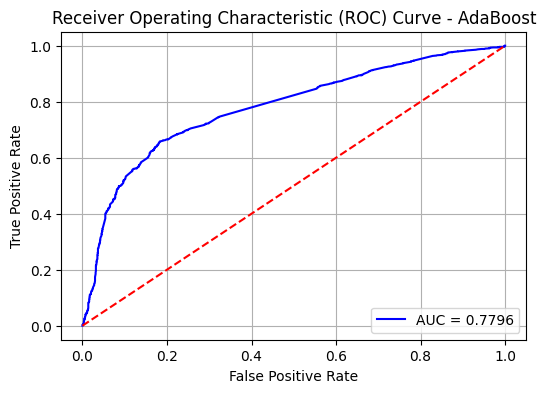

In [39]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {auc:.4f}')

# Step 8: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



 # Tuning

In [40]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Hyperparameters: {'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 200}
Test Accuracy: 0.7303
Test AUC: 0.7843


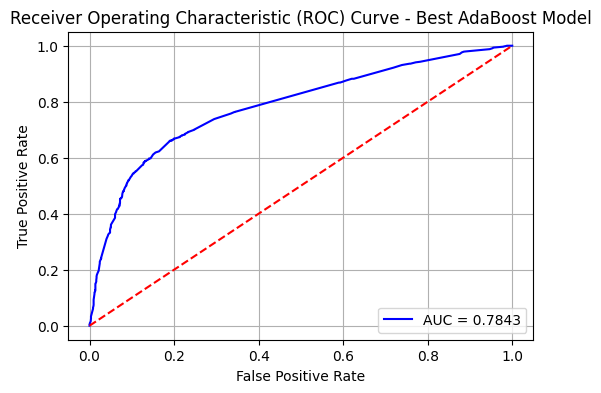

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Initialize the base estimator
base_estimator = DecisionTreeClassifier()

# Step 2: Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.5, 1],  # Step size for each learner
    'estimator__max_depth': [1, 2, 3]  # Depth of the base decision tree
}

# Step 3: Initialize the AdaBoost Classifier
ada_model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Step 4: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=ada_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Optimize for AUC
    n_jobs=-1,  # Use all available cores
    verbose=2  # Display progress
)

# Step 5: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 6: Retrieve the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Step 7: Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

# Step 8: Plot the ROC Curve for the best model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best AdaBoost Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
